In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import KFold

# 【問題1】データセットの取得

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [6]:
df.shape

(1460, 81)

In [7]:
df.head(30)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

# 【問題2】データセット自体の調査

## idと79個の説明変数と目的変数である販売価格が1460行分格納されているデータ
## testデータには販売価格を除いたidと79個の説明変数が1459行分格納されている

# 【問題3】データの確認

## 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 特徴量はint型の数値データが33個、float型の数値データが3個、object型が43個
### ただ'MSSubClass'のようにカテゴリ変数にも関わらず、int型でラベルされているものもあるため注意が必要かもしれない。

## 今回の目的変数はどの列か確認する。

In [9]:
for column in df.columns:
    if column not in test.columns:
        print(column)

SalePrice


### テストデータに入っていない'SalePrice'が目的変数

## 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応

## 各特徴量の欠損値の有無を確認する。

In [11]:
import missingno

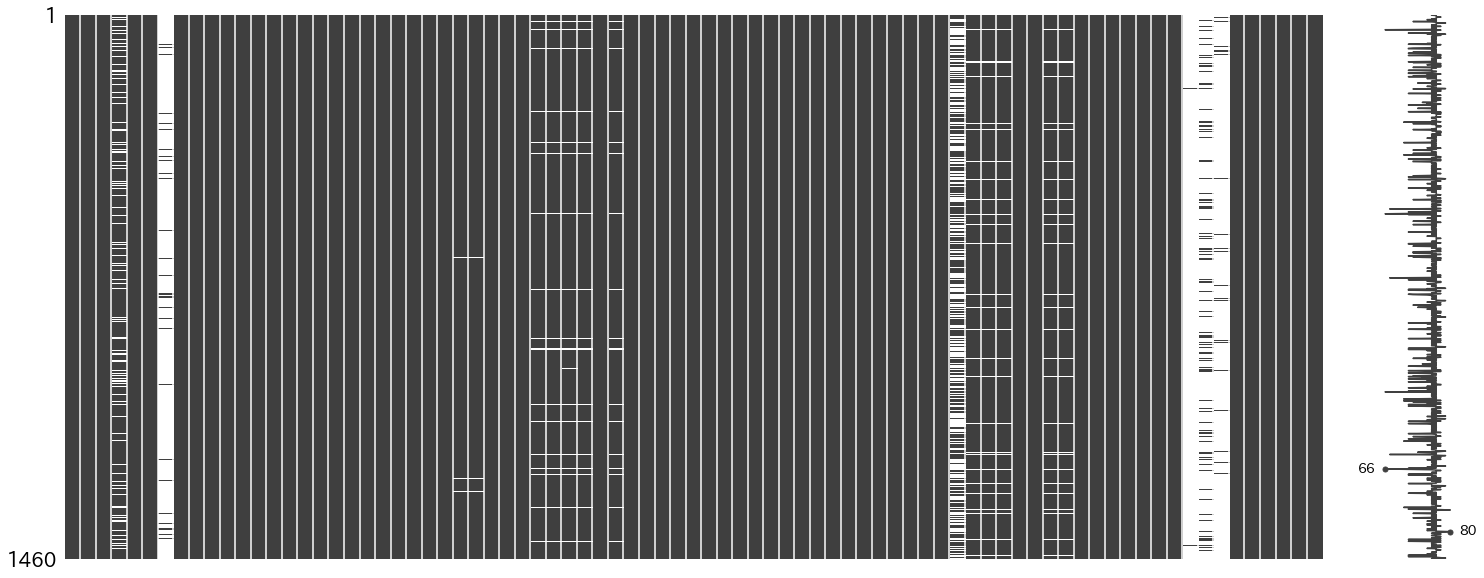

In [12]:
missingno.matrix(df)

In [13]:
nan_columns = [column for column in df.columns if df[column].isnull().sum() > 0]
print(nan_columns)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


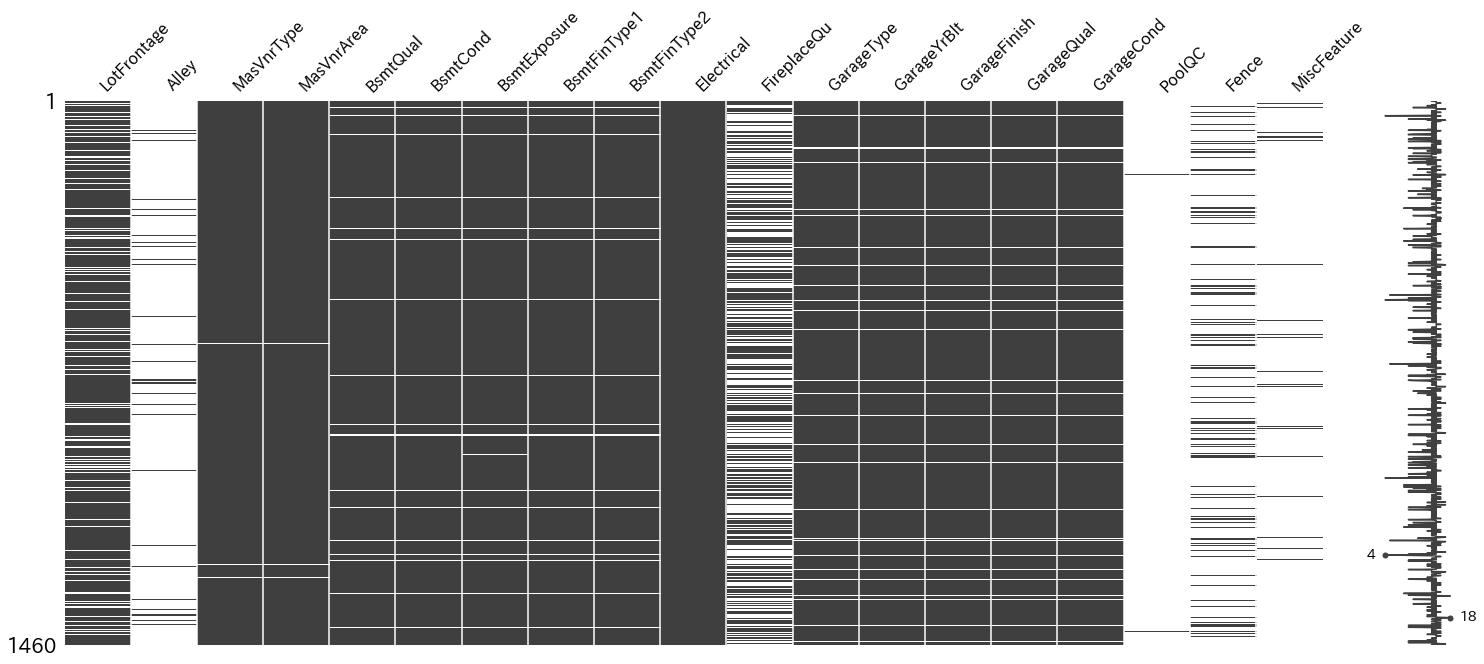

In [14]:
missingno.matrix(df[nan_columns])

## 欠損値が何パーセント含まれるかを確認する。

In [15]:
nan_dict = {column: df[column].isnull().sum() for column in df.columns}
nan_df = pd.DataFrame.from_dict(nan_dict, orient='index')
nan_df.columns = ['Total']
nan_df['missing_ratio'] = nan_df[('Total')]/len(df)
nan_df.sort_values('Total', ascending=False, inplace=True)
nan_df

,Total,missing_ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


## 5つ以上欠損値がある特徴量（列）は削除する。

In [16]:
df.dropna(thresh=1456, axis=1, inplace=True)

## 欠損値があるサンプル（行）は削除する。

In [17]:
df.dropna(inplace=True)

# 【問題5】用語の調査

## 尖度

### 分布が正規分布からどれだけ尖っているかを表す統計量で山の尖り度と裾の広がり度を示す。
### 正規分布より尖った分布の時には正の値を、正規分布より扁平な分布の時には負の値をとり、正規分布の時には０になる。

## 歪度

### 分布が正規分布からどれだけ歪んでいるかを表す統計量で左右対称性を示す指標のこと。
### 右裾が長いもしくは右に歪んだもしくは左に偏った分布のときには正の値を、
### 左裾が長いもしくは「左に歪んだもしくは右に偏った分布のときには負の値をとる。
### 左右対称の分布（例えば正規分布）の場合には0になる。

# 【問題6】分布の確認

## seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

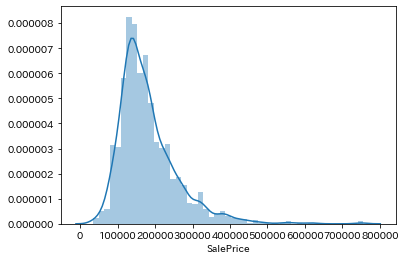

In [18]:
sns.distplot(df['SalePrice'])

In [19]:
kurtosis = df['SalePrice'].kurt()
skewness = df['SalePrice'].skew()
print('尖度:{}'.format(kurtosis))
print('歪度:{}'.format(skewness))

尖度:6.529263049673958
歪度:1.8819429948035529


## 目的変数に対して対数変換を行う。

In [20]:
df['SalePrice'] = np.log(df['SalePrice'])

## 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

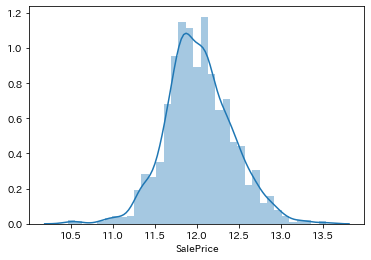

In [21]:
sns.distplot(df['SalePrice'])

In [22]:
kurtosis = df['SalePrice'].kurt()
skewness = df['SalePrice'].skew()
print('尖度:{}'.format(kurtosis))
print('歪度:{}'.format(skewness))

尖度:0.806927847502148
歪度:0.12131775882415026


## 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。

### 尖度が大きく、分布がどちらかに偏っている分布では対数変換することで正規分布に近くなる

# 【問題7】相関係数の確認

## 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

In [23]:
correlation_matrix = df.corr()
correlation_matrix

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.010589,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.004001,-0.005668,-0.007508,-0.013815,0.011627,0.004885,-0.044139,0.008524,0.003158,-0.019917,0.004758,0.005494,0.037577,0.003177,0.026948,-0.018788,0.016254,0.018010,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.017969
MSSubClass,0.010589,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,-0.238160,-0.251484,0.307713,0.046524,0.074949,0.003799,-0.002243,0.131354,0.177004,-0.023502,0.281833,0.040274,-0.045232,-0.040232,-0.098558,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.073971
LotArea,-0.033170,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,0.260962,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.190037,0.271398,0.154893,0.180392,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.257321
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,0.537523,0.475933,0.295969,-0.030502,0.593021,0.110700,-0.040291,0.551267,0.274328,0.101789,-0.184040,0.427720,0.396455,0.600991,0.561980,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.817368
OverallCond,0.013167,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,-0.171796,-0.144646,0.029187,0.025454,-0.079777,-0.055250,0.117749,-0.193929,-0.060371,0.013039,-0.087085,-0.057485,-0.024167,-0.185670,-0.151662,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.036867
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,0.393159,0.283056,0.009784,-0.183774,0.199286,0.188374,-0.037990,0.467960,0.241923,-0.070813,-0.174715,0.095401,0.148580,0.537866,0.479460,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.586827
YearRemodAdd,-0.023158,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,0.292546,0.241344,0.139607,-0.062356,0.287677,0.120148,-0.012165,0.438733,0.182595,-0.040718,-0.149503,0.191603,0.113360,0.420573,0.372012,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.565822
BsmtFinSF1,-0.004001,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,1.000000,-0.050328,-0.495718,0.521963,0.445473,-0.136697,-0.064604,0.208088,0.649025,0.067281,0.059102,0.005085,-0.107281,-0.081175,0.044529,0.259541,0.224342,0.296851,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.372152
BsmtFinSF2,-0.005668,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.050328,1.000000,-0.209395,0.104593,0.096948,-0.099146,0.014784,-0.009686,0.158557,0.070904,-0.076306,-0.031922,-0.015696,-0.040795,-0.035170,0.046748,-0.038204,-0.018295,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,0.004835
BsmtUnfSF,-0.007508,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,-0.495718,-0.209395,1.000000,0.415283,0.317827,0.004661,0.028134,0.240210,-0.423256,-0.095880,0.289189,-0.040792,0.166701,0.030028,0.250754,0.051323,0.214284,0.183224,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.222001


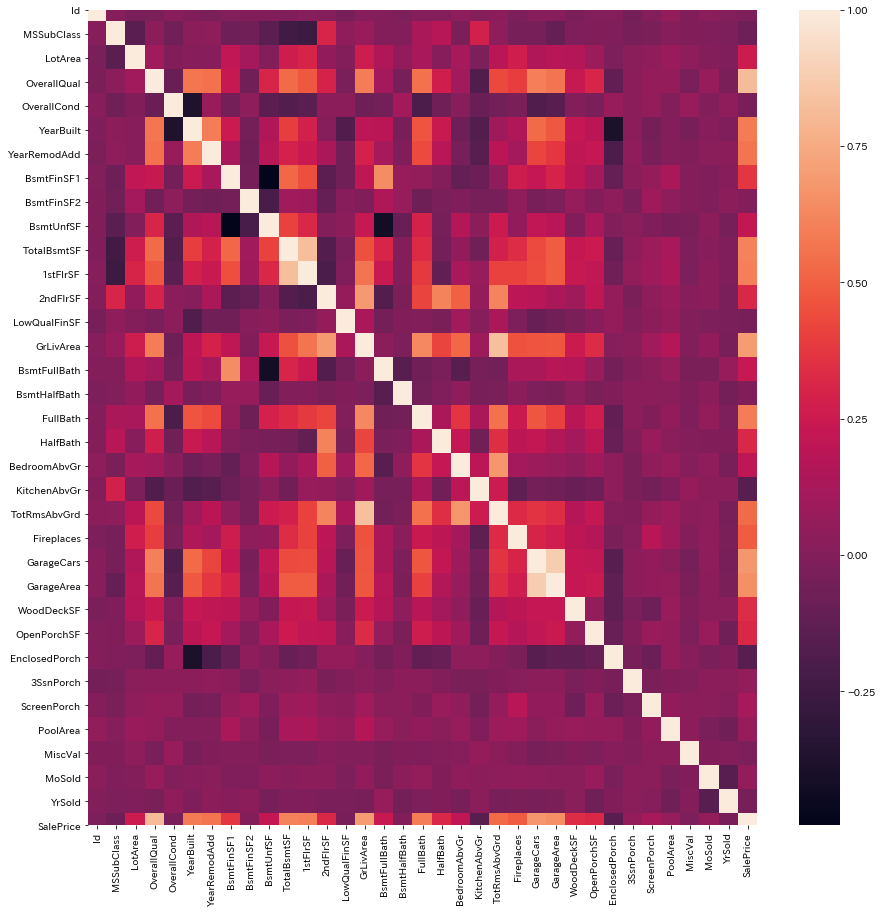

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(correlation_matrix)

In [25]:
for column in correlation_matrix.columns:
    print('{}:{}'.format(column, correlation_matrix[column].abs().nlargest(5)))

Id:Id              1.000000
PoolArea        0.057163
3SsnPorch       0.046550
LowQualFinSF    0.044139
BedroomAbvGr    0.037577
Name: Id, dtype: float64
MSSubClass:MSSubClass      1.000000
2ndFlrSF        0.307713
KitchenAbvGr    0.281833
1stFlrSF        0.251484
TotalBsmtSF     0.238160
Name: MSSubClass, dtype: float64
LotArea:LotArea        1.000000
1stFlrSF       0.299533
Fireplaces     0.271398
GrLivArea      0.263109
TotalBsmtSF    0.260962
Name: LotArea, dtype: float64
OverallQual:OverallQual    1.000000
SalePrice      0.817368
GarageCars     0.600991
GrLivArea      0.593021
YearBuilt      0.573334
Name: OverallQual, dtype: float64
OverallCond:OverallCond    1.000000
YearBuilt      0.375780
FullBath       0.193929
GarageCars     0.185670
TotalBsmtSF    0.171796
Name: OverallCond, dtype: float64
YearBuilt:YearBuilt       1.000000
YearRemodAdd    0.592512
SalePrice       0.586827
OverallQual     0.573334
GarageCars      0.537866
Name: YearBuilt, dtype: float64
YearRemodAdd:YearRemo

### OveralQualとSaleprice、TotalBsmtSFと1stFlrSF、GrLiveAreaとTotRmsAbvGrd、GarageCarsとGarageAreaの相関係数が高い

## 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [26]:
high_correlation_list = list(correlation_matrix['SalePrice'].nlargest(11).index)
high_correlation_list

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd']

In [27]:
high_correlation_matrix = correlation_matrix.loc[high_correlation_list, high_correlation_list]

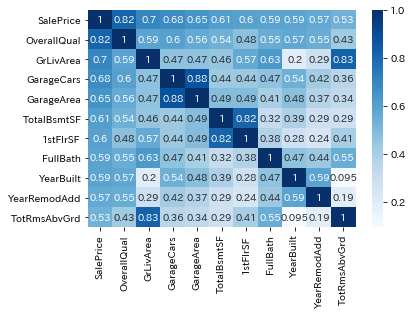

In [28]:
sns.heatmap(high_correlation_matrix, annot=True, cmap='Blues')
plt.ylim(len(high_correlation_matrix), 0)
plt.show()

## 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

- OverallQual:材料と仕上がり。int型で入力されているが、カテゴリ変数のため扱いに注意が必要かもしれない。
- GrLiveArea:地上のリビングの広さ
- GarageCars:ガレージに入る車の台数
- GarageArea:ガレージの広さ
- TotalBsmtSF:地下室の広さ
- FullBath:地上のフルバスルームの数
- 1stFlrSF:1階の広さ
- YearBuilt:最初に建築された年
- YearRemodAdd:改修された年。改修されていなければ建築された年と同じ
- TotRmsAbvGrd:地上の部屋数（バスルームを除く）

## 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

In [29]:
high_correlation_matrix[high_correlation_matrix > 0.8]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd
SalePrice,1.000000,0.817368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,0.817368,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825576
GarageCars,NaN,NaN,NaN,1.000000,0.882613,NaN,NaN,NaN,NaN,NaN,NaN
GarageArea,NaN,NaN,NaN,0.882613,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,1.000000,0.819393,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,NaN,0.819393,1.000000,NaN,NaN,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


### GrLivAreaとTotRmsAbvGrd、GarageCarsとGarageArea、TotalBsmtSFと1stFlrSFの相関係数が高い

# Kaggleに提出する

## 上記の10個の特徴量で線形回帰を使う

In [30]:
train_x = df[high_correlation_list].drop('SalePrice', axis=1)
train_y = df['SalePrice']
test_x = test[high_correlation_list[1:]]

In [31]:
train_x

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd
0,7,1710,2,548,856,856,2,2003,2003,8
1,6,1262,2,460,1262,1262,2,1976,1976,6
2,7,1786,2,608,920,920,2,2001,2002,6
3,7,1717,3,642,756,961,1,1915,1970,7
4,8,2198,3,836,1145,1145,2,2000,2000,9
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,1999,2000,7
1456,6,2073,2,500,1542,2073,2,1978,1988,7
1457,7,2340,1,252,1152,1188,2,1941,2006,9
1458,5,1078,1,240,1078,1078,1,1950,1996,5


In [32]:
train_y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64

In [33]:
clf = LinearRegression()

In [34]:
clf.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
test_x[test_x.isnull().any(axis=1)]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd
660,4,896,1.0,280.0,NaN,896,1,1946,1950,4
1116,5,1828,NaN,NaN,859.0,942,2,1923,1999,6


In [36]:
# testデータの欠損値に中央値を入れる
test_x['GarageCars'].fillna(test_x['GarageCars'].median(),inplace=True)
test_x['GarageArea'].fillna(test_x['GarageArea'].median(),inplace=True)
test_x['TotalBsmtSF'].fillna(test_x['TotalBsmtSF'].median(),inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [37]:
pred = np.exp(clf.predict(test_x))

In [38]:
pred

array([113657.64494409, 142572.53584323, 162978.18475021, ...,
       149409.24074207, 119042.78379242, 234999.81841349])

In [39]:
submission_linearregression_features_10 = pd.read_csv('sample_submission.csv')

In [40]:
submission_linearregression_features_10

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [41]:
submission_linearregression_features_10['SalePrice'] = pred

In [42]:
# submission_linearregression_features_10.to_csv('submission_linearregression_features_10.csv', index=False)

### score:0.16258、順位：2939位

## 特徴量同士で相関の強かった特徴量を３つ落とし、特徴量を7個にする

In [43]:
# TotRmsAbvGrdとGarageAreaと1stFlrSFを落とす
train_x_drop3 = train_x.drop(['TotRmsAbvGrd', 'GarageArea', '1stFlrSF'], axis=1)
test_x_drop3 = test_x.drop(['TotRmsAbvGrd', 'GarageArea', '1stFlrSF'], axis=1)

In [44]:
clf_drop3 = LinearRegression()

In [45]:
clf_drop3.fit(train_x_drop3, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
pred_drop3 = np.exp(clf_drop3.predict(test_x_drop3))

In [47]:
pred_drop3

array([111092.37389531, 141985.65917823, 166251.00161997, ...,
       148015.77381215, 117910.17629154, 237789.84588373])

In [48]:
submission_linearregression_features_7 = pd.read_csv('sample_submission.csv')

In [49]:
submission_linearregression_features_7['SalePrice'] = pred_drop3

In [50]:
# submission_linearregression_features_7.to_csv('submission_linearregression_features_7.csv', index=False)

### score:0.16349
### scoreが少し落ちてしまった

## 特徴量を10個に戻して、広さの特徴量を標準化する

In [51]:
train_x

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd
0,7,1710,2,548,856,856,2,2003,2003,8
1,6,1262,2,460,1262,1262,2,1976,1976,6
2,7,1786,2,608,920,920,2,2001,2002,6
3,7,1717,3,642,756,961,1,1915,1970,7
4,8,2198,3,836,1145,1145,2,2000,2000,9
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,1999,2000,7
1456,6,2073,2,500,1542,2073,2,1978,1988,7
1457,7,2340,1,252,1152,1188,2,1941,2006,9
1458,5,1078,1,240,1078,1078,1,1950,1996,5


In [52]:
def standardization(data):
    standardized_number = (data - data.mean())/data.std(ddof=0)
    return standardized_number

In [53]:
standardization_list = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
for column in standardization_list:
    train_x[column] = standardization(train_x[column])
    test_x[column] = standardization(test_x[column])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [54]:
clf_standardization = LinearRegression()

In [55]:
clf_standardization.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
pred_standardization = np.exp(clf_standardization.predict(test_x))

In [57]:
pred_standardization

array([113390.93763289, 143233.68141663, 164763.11339677, ...,
       149829.28826794, 118969.86721339, 239087.4548973 ])

In [58]:
submission_standardization = pd.read_csv('sample_submission.csv')

In [59]:
submission_standardization['SalePrice'] = pred_standardization

In [60]:
# submission_standardization.to_csv('submission_standardization.csv', index=False)

### score:0.16176 順位:2933位

## lightgbmを使う

In [61]:
tr_x, va_x, tr_y, va_y = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

In [62]:
categorical_features = ['OverallQual']

In [63]:
lgb_train = lgb.Dataset(tr_x, tr_y, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(va_x, va_y, reference=lgb_train, categorical_feature=categorical_features)

In [64]:
params = {'objective': 'regression', 'metrics':'rmse'}

In [65]:
model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], verbose_eval=10, 
                  num_boost_round=1000, early_stopping_rounds=20)

Training until validation scores don't improve for 20 rounds
[10]	training's rmse: 0.201992	valid_1's rmse: 0.197578
[20]	training's rmse: 0.14376	valid_1's rmse: 0.160806
[30]	training's rmse: 0.124685	valid_1's rmse: 0.157475
[40]	training's rmse: 0.11265	valid_1's rmse: 0.156487
[50]	training's rmse: 0.103205	valid_1's rmse: 0.15725
Early stopping, best iteration is:
[38]	training's rmse: 0.114686	valid_1's rmse: 0.15592


C:\Anaconda\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [66]:
pred_lightgbm = np.exp(model.predict(test_x, num_iteration=model.best_iteration))

In [67]:
pred_lightgbm

array([118003.75202429, 143390.03896224, 169431.13386927, ...,
       160506.52701225, 112574.61171404, 238476.11831907])

In [68]:
submission_lightgbm = pd.read_csv('sample_submission.csv')

In [69]:
submission_lightgbm['SalePrice'] = pred_lightgbm

In [70]:
# submission_lightgbm.to_csv('submission_lightgbm.csv', index=False)

### score:0.1702

## クロスバリデーションを使う

In [71]:
preds_list = []
models_list = []
oof_train = np.zeros(len(train_x),)
cv = KFold(n_splits=5, shuffle=True, random_state=0)
for fold_id, (tr_idx, va_idx) in enumerate(cv.split(train_x)):
    tr_x = train_x.loc[tr_idx, :]
    va_x = train_x.loc[va_idx, :]
    tr_y = train_y[tr_idx]
    va_y = train_y[va_idx]
    lgb_train = lgb.Dataset(tr_x, tr_y, categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(va_x, va_y, categorical_feature=categorical_features)
    model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], verbose_eval=10, 
                     num_boost_round=1000, early_stopping_rounds=20)
    oof_train[va_idx] = model.predict(va_x, num_iteration=model.best_iteration)
    pred_kfold = model.predict(test_x, num_iteration=model.best_iteration)
    preds_list.append(pred_kfold)
    models_list.append(model)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Anaconda\lib\site-packages\pandas\core\series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Training until validation scores don't improve for 20 rounds
[10]	training's rmse: 0.378883	valid_1's rmse: 0.20248
[20]	training's rmse: 0.341189	valid_1's rmse: 0.164679
[30]	training's rmse: 0.324846	valid_1's rmse: 0.164683
[40]	training's rmse: 0.311924	valid_1's rmse: 0.165708
Early stopping, best iteration is:
[24]	training's rmse: 0.333919	valid_1's rmse: 0.163347
Training until validation scores don't improve for 20 rounds
[10]	training's rmse: 0.377237	valid_1's rmse: 0.200599
[20]	training's rmse: 0.339523	valid_1's rmse: 0.165319
[30]	training's rmse: 0.322552	valid_1's rmse: 0.163396
[40]	training's rmse: 0.309397	valid_1's rmse: 0.165603
[50]	training's rmse: 0.297738	valid_1's rmse: 0.165549
Early stopping, best iteration is:
[30]	training's rmse: 0.322552	valid_1's rmse: 0.163396
Training until validation scores don't improve for 20 rounds
[10]	training's rmse: 0.195207	valid_1's rmse: 0.750802
[20]	training's rmse: 0.1365	valid_1's rmse: 0.737853
[30]	training's rmse: 

In [72]:
pred_kfold = np.exp(sum(preds_list)/len(preds_list))

In [73]:
submission_kfold = pd.read_csv('sample_submission.csv')

In [74]:
submission_kfold['SalePrice'] = pred_kfold

In [75]:
# submission_kfold.to_csv('submission_kfold.csv', index=False)

### score:0.17138
### ３回目のfoldでtraining's rmse: 0.0724921	valid_1's rmse: 0.727704となっているので、過学習を起こしてしまったのかもしれない

## ３回目のfoldを計算から外す

In [76]:
pred_kfold_non3 = np.exp((sum(preds_list) - preds_list[2])/(len(preds_list) - 1))

In [77]:
submission_kfold_non3 = pd.read_csv('sample_submission.csv')

In [78]:
submission_kfold_non3['SalePrice'] = pred_kfold_non3

In [79]:
# submission_kfold_non3.to_csv('submission_kfold_non3.csv', index=False)

### score:0.17567

## linearregressionとlightgbmをアンサンブルする

In [80]:
submission_standardization

,Id,SalePrice
0,1461,113390.937633
1,1462,143233.681417
2,1463,164763.113397
3,1464,181591.259473
4,1465,206691.069639
...,...,...
1454,2915,95478.097672
1455,2916,104838.171965
1456,2917,149829.288268
1457,2918,118969.867213


In [81]:
submission_ensemble = pd.read_csv('sample_submission.csv')

In [82]:
submission_ensemble['SalePrice'] = (submission_standardization['SalePrice'] + submission_lightgbm['SalePrice'])/2

In [83]:
# submission_ensemble.to_csv('submission_ensemble.csv', index=False)

### score:0.1587 順位2850位
### 評価方法がrmseのため外れ値の影響が大きいが、アンサンブルしたことで予測が大きく離れている数値が少しましになったのかもしれない